<a href="https://colab.research.google.com/github/Berte08/CSI4106/blob/main/Copie_de_CSI4506_A1_Modele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEVOIR 1 - ÉTUDE EMPIRIQUE DU PROBLÈME DU SAC À DOS**

**1. Information sur le groupe et le rapport**

Numéro du Groupe: 71
Nom des membres du groupe: Berte Tata Saïdatou
Numéros d'étudiants des membres du groupe : 300100935

**2. Problème du Sac à dos (Knapsack)**

Dans ce devoir, nous allons explorer le problème du sac a dos. Le problème du sac à dos est un problème d'optimisation combinatoire qui consiste a faire le choix d'objets parmi un ensemble donné pour les placer dans un sac à dos de capacité limitée. Chaque objet a un poids et une valeur spécifiques, et l'objectif est de sélectionner une combinaison d'objets qui maximise la valeur totale tout en respectant la contrainte de capacité du sac. Ce fréquenment utilisé dans plusieurs applications, notamment la logistique, la gestion des stocks et la finance. Pour resoudre le problème du sac a dos, on peut utiliser plusiers méthodes d'optimisation telles que l'algorithme glouton, le recuit simulé et l'algorithme génétique pour trouver la solution optimale.

**3. Ensemble de données**

 L'ensemble de données utilisé pour résoudre le problème du sac à dos provient de Kaggle et est intitulé "Knapsack Problem".Le jeu de données contient plusieurs attributs.

**Weights (Poids)** : Cette colonne représente les poids des objets disponibles pour être placés dans le sac à dos.

**Prices (Prix)** : Cette colonne représente les valeurs ou prix associés aux objets. Ces valeurs indiquent l'importance ou la valeur des objets à placer dans le sac à dos, et elles sont également données sous forme de tableaux de valeurs entières.

**Capacity (Capacité)** : Cette colonne indique la capacité maximale du sac à dos, c'est-à-dire la quantité maximale de poids que le sac peut contenir sans dépasser sa limite.

**Best picks (Meilleures sélections)** : Cette colonne représente une solution optimale ou proche de l'optimale pour chaque instance du problème. Elle est donnée sous forme de tableau binaire, où 1 indique que l'objet correspondant doit être sélectionné pour être placé dans le sac, et 0 indique le contraire.

**Best price (Meilleur prix)** : Cette colonne indique la valeur totale de la meilleure solution trouvée ou connue pour chaque instance du problème. Il s'agit de la somme des valeurs des objets sélectionnés dans la meilleure solution.







**Faire l'importation des bibliothèques importantes**

In [ ]:
!pip install matplotlib
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt

**Lire l'ensemble de données**

Comme indiqué dans la description du projet, les correcteurs devraient pouvoir exécuter votre notebook sans nécessiter de téléchargement.

Pour permettre l'accès à l'ensemble de données dans votre notebook, vous pouvez le mettre sur un répertoire GitHub public et fournir un lien vers la version originale de l'ensemble de données.

Votre lien vers l'ensemble de données devrait être comme suit:
*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.csv*

Par exemple:

https://raw.githubusercontent.com/baharin/KnapsackProblem/main/knapsack_5_items.csv

Maintenant, dans votre code, mettez le lien vers VOTRE dataset et lisez-le avec pandas:

In [ ]:
url ="https://raw.githubusercontent.com/Berte08/CSI4106/main/knapsack_5_items.csv"

dataset = pd.read_csv(url)

Regardons quelles sont les colonnes du dataset :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

Comme nous nous y attendions, nous avons des colonnes pour les poids, les coûts, la capacité, les meilleurs choix et le meilleur prix pour toutes les instances.

Regardons les 10 premières entrées (rangées):

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Étape de pré-traitenemtn**

Règle générale, la première étape de tout projet impliquant la lecture et la manipulation de données est le prétraitement et le nettoyage des données.

Dans notre ensemble de données, nous nous attendons à ce que les entrées des colonnes « Weights », « Prices » et « Best Picks » se présentent sous la forme de tableaux de nombres réels ou d'entiers, comme ceci : [45, 40, 42, 38, 10]

Cependant, lorsque vous lisez les entrées à l'aide de pandas, elles se présentent sous la forme de chaînes (String): "[45 40 42 38 10]"

Nous devons donc convertir ces chaînes en « tableaux de réels ou d’entiers ». Vous pouvez utiliser la fonction fournie ci-dessous à cet effet :


In [ ]:
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

De plus, il est possible que certaines lignes de l'ensemble de données contiennent des valeurs vides dans des colonnes spécifiques. Nous voulons également éliminer ces lignes car elles ne fournissent aucune information utile. Nous utilisons la fonction dropna() pour ce faire :

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))


Il est maintenant temps de mettre en œuvre les algorithmes de recherche. Pour chaque algorithme, un modèle vous est fourni. Vous pouvez modifier ce modèle si vous voulez, mais regardez d'abord tous les paramètres utilisés car ils sont tous importants. Vous pouvez également définir autant de fonctions auxiliaires que vous le souhaitez.

**4. Generate and Test**

Donnez une description...  Aussi, assurez-vous de mettre des commentaires en utilisant vos propres mots dans le code pour montrer que vous comprenez le code que vous soumettez.

In [ ]:
def gen_and_test(data):


  return best_solution_price, best_solution



In [ ]:
# solutions = []
# for _, row in dataset.iterrows():
#     target = row['Best price']
#     solution, indexes = gen_and_test(row)
#     solutions.append(1 if target == solution else 0)


NameError: ignored

In [ ]:
# # Accuracy
# print('Accuracy of best prices found is', np.mean(solutions))

**Votre analyse:**

------------------------------------------------------------------------------------------------

**5. Recherche gloutonne (greedy search)**

L'algorithme glouton est une approche gloutonne qui consiste à trier les objets en fonction de leur rapport valeur/poids, v/w, puis à les ajouter dans le sac en respectant la capacité maximale. Il faut toujours privilégier l'objet le plus "rentable" à chaque étape. Dans cette approche on prend la décision la plus avantageuse sans se soucier de l'impact que cela pourrait avoir sur les étapes ultérieures

In [ ]:
def greedy(data):
  # La recherche Gloutonne permet de choisir le plus haut coût d'abord

 # Commencons par extraire les valeurs poids prix et capacity du dataset
    poids = data['Weights']
    prix = data['Prices']
    capacity = data['Capacity']
# soit n la longeur complete des poids de notre dataset
    n = len(poids)
    best_solution = [0] * n
    best_solution_price = 0.0

    # Triez les objets par rapport à leur rapport valeur/poids (prix/poids).
    rapport_poids_prix = [p / w for p, w in zip(prix, poids)]
    sorted_items = sorted(range(n), key=lambda i: rapport_poids_prix[i], reverse=True)

   #Definir la capacité du sac a 0 lorsqu'on commence les itération
    current_capacity = 0

    for i in sorted_items:
        if poids[i] <= capacity - current_capacity:
            best_solution[i] = 1
            best_solution_price += prix[i]
            current_capacity += poids[i]
        else:
            best_solution[i] = 0

    return best_solution_price, best_solution


In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)


In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8341937443061038


In [ ]:
recall = sum(solutions_greedy) / len(solutions_greedy)
print("Greedy Recall is : {:.2f}".format(recall))

Greedy Recall is : 0.83


**Votre analyse:**

On obtient une précision de 0.8341937443061038 ce qui est relativement élever pour un algorithme glouton appliqué au problème du sac à dos indique que l'algorithme a trouvé une solution qui est évaluée à 83,42%. La précision est généralement mesurée en comparant la valeur de la solution trouvée par l'algorithme à la meilleure solution connue dans la colonne "Best price" de l'ensemble de donnée.

Un rappel de 0.83 montre que l'algorithme glouton a réussi à capturer environ 83 % des solutions optimales parmi toutes les solutions possibles testées. Cela indique que l'algorithme gloutonne est relativement performante vis a vis du probleme du sac a dos.







------------------------------------------------------------------------------------------------

**6. Recuit Simulé ( Simulated Annealing )**

L'algorithme du recuit simulé est une méthode de recherche heuristique dans la quelle l'algorithme se base sur les solution voisine. Le but est de permettre des mouvements vers des solutions voisines, même si elles sont moins bonnes, avec une probabilité décroissante au fil du temps.


Dans le Recuit Simulé, nous commençons par initialiser une solution aléatoire pour le sac à dos. Ensuite, nous itérons N fois où N équivaut a la longeur de notre dataset. On génère ainsi une solution voisine en inversant aléatoirement un bit de la solution actuelle. Si la solution voisine est meilleure que la solution actuelle ou si elle est acceptée avec une certaine probabilité (basée sur la différence de fitness et la température actuelle), alors elle devient la nouvelle solution actuelle. Nous réduisons progressivement la température en multipliant par un facteur de refroidissement à chaque itération. Finalement, nous renvoyons la meilleure solution trouvée.


In [ ]:
import random
import math

def calculate_fitness(ind, prices, weights, capacity):
    total_value = sum(ind[i] * prices[i] for i in range(len(ind)))
    total_weight = sum(ind[i] * weights[i] for i in range(len(ind)))
    if total_weight > capacity:
        return 0  # La solution est invalide si elle dépasse la capacité du sac à dos
    return total_value

def simulated_annealing(data, N, initial_temperature, cooling_rate):
  #  commençons par initialiser une solution aléatoire pour le sac à dos.
  # Commencons par extraire les valeurs poids prix et capacity du dataset
    weights= data["Weights"]
    prices= data["Prices"]
    capacity= data["Capacity"]

    n= len(weights)

    # Initialisation  solution initiale aléatoire
    current_solution= [random.randint(0, 1) for _ in range(n)]
    current_solution_price = calculate_fitness(current_solution, prices, weights, capacity)

    # Initialisation des variables  de la meilleure solution connue<
    # Etant au debut, on sait que best_solution=current_solution
    best_solution= current_solution
    best_solution_price= current_solution_price

    # boucle principale dans la quelle on génère une solution voisine en inversant  un bit de la solution actuelle.
    for iteration in range(N):
        # sélection d'une solution voisine
        solution_voisine= list(current_solution)
        random_index = random.randint(0, n - 1)
        solution_voisine[random_index] = 1 - solution_voisine[random_index]  # changement  du bit

        # calcul de la fitness de la solution voisine
        solution_voisine_prix= calculate_fitness(solution_voisine, prices, weights, capacity)

        # calcul de la différence de fitness entre la solution actuelle et la voisine
        delta = solution_voisine_prix-current_solution_price

        # verifier si la solution voisine est meilleure
        if delta > 0 or random.random() < math.exp(delta / initial_temperature):
            current_solution=solution_voisine
            current_solution_price= solution_voisine_prix

        # Mettre à jour la meilleure solution connue si nécessaire
        if current_solution_price > best_solution_price:
            best_solution = current_solution
            best_solution_price = current_solution_price

        # diminution de la temperature
        initial_temperature *= cooling_rate




        return best_solution_price, best_solution


In [ ]:
solutions_sa = []
cooling_rates = [0.9, 0.8, 0.7]
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 15, initial_temperature=1, cooling_rate=0.7)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.009616357930964672


In [ ]:
# Calcul du rappel
solution_optimale = sum(solutions_sa)  # Somme des 1 dans la liste
total_optimal_solutions = len(solutions_sa)  # Le nombre total de solutions testées
recall = solution_optimale / total_optimal_solutions
print("Simulated Annealing Recall is: {:.2f}".format(recall))





Simulated Annealing Recall is: 0.01


**Votre analyse:**

Nous avons tester et ajuster les parametres comme ci dessous:

| N | Cooling_rate | Accuracy  |Rappel|
|-------|-----|-------------|---------|
| 10 | 0.95  | 0.0096   |0.01|
| 10   | 0.8  | 0.0100    |0.01|
| 10 | 0.7  | 0.0089  |0.01|
| 15 | 0.8  | 0.010  |0.01|
| 15 | 0.7  | 0.009 |0.01|


 Les valeurs de la précision ou **accuracy** sont très faibles (environ 0.01), ce qui signifie que l'algorithme de recuit simulé a du mal à trouver des solutions optimales. La précision est le pourcentage de solutions optimales trouvées par rapport au nombre total de solutions testées.

 Le rappel est également très faible (environ 0.01), ce qui signifie que l'algorithme n'a pu détecter qu'une très petite fraction des solutions optimales parmi toutes les solutions possibles.

Ces metrics signifient que l'algorithme n'a pas réussi à trouver une solution optimale. En comparant la valeur de la solution trouvée par l'algorithme de recuit simulé à la meilleure solution connue c'est à dire la colonne Best Price.

Cette précision est du a plusieurs facteurs:
- L'algorithme du recuit simulé commence par une solution initiale aléatoire. Si cette solution de départ est très éloignée de la solution optimale, l'algorithme peut avoir du mal à trouver une solution optimale





------------------------------------------------------------------------------------------------

**7. Algorithme génétique**

L'algorithme génétique est un algorithme basée sur la biologie de l'évolution. Dans le problème du Sac a dos on veut maximiser la valeur totale des objets à mettre dans un sac à dos tout en respectant une contrainte de capacité. On commence par initialiser une population de solutions que l'on représentées par des vecteurs binaires( 0 => non appartenance; 1=> appartenance). Le fitness mesure la valeur totale des objets dans le sac tout en respectant la capacité du sac. Ensuite on passe à l'etape de la reproduction, favorisant ceux avec une meilleure aptitude. Les opérations de croisement et de mutation sont passés aux parents sélectionnés pour créer une nouvelle génération d'individus. Ce processus se répète sur plusieurs générations, favorisant ainsi l'amélioration de la qualité des solutions.

In [ ]:
import random

def calculate_fitness(ind, prices, weights, capacity):
  # faire la somme total des poids et des prix
   total_value = sum(ind[i] * prices[i] for i in range(len(ind)))
   fitness = sum(ind[i] * weights[i] for i in range(len(ind)))
   if fitness > capacity:
        return 0  # La solution est invalide si elle dépasse la capacité du sac à dos
   return fitness

def crossover(parent1, parent2, cross_rate):

   if random.random() < cross_rate:
        point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2

   else:
        return parent1, parent2


def mutation(child, mut_rate):
   mutated_child = list(child)
   for i in range(len(mutated_child)):
        if random.random() < mut_rate:
            mutated_child[i] = 1 - mutated_child[i]  # Inversion de 0 à 1 ou de 1 à 0

   return child

def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):
    weights = data["Weights"]
    prices = data["Prices"]
    capacity = data["Capacity"]

    n = len(weights)

    # Initialisation de la population
    population = [random.choices([0, 1], k=n) for _ in range(population_size)]

    best_solution = None
    best_solution_price = 0.0

    for generation in range(num_generations):
        # Évaluation de la fitness de chaque individu
        fitness_scores = [calculate_fitness(ind, prices, weights, capacity) for ind in population]

        # Sélection des parents par tournoi
        parents = []
        for _ in range(population_size):
            tournament = random.sample(range(population_size), tournament_size)
            selected_parent_index = max(tournament, key=lambda i: fitness_scores[i])
            parents.append(population[selected_parent_index])

        # Création de la prochaine génération par croisement et mutation
        new_population = []
        for i in range(0, population_size, 2):
            parent1 = parents[i]
            parent2 = parents[i + 1]
            child1, child2 = crossover(parent1, parent2, cross_rate)
            child1 = mutation(child1, mut_rate)
            child2 = mutation(child2, mut_rate)
            new_population.extend([child1, child2])

        population = new_population

        # Trouver la meilleure solution de cette génération
        generation_best = max(population, key=lambda ind: calculate_fitness(ind, prices, weights, capacity))
        generation_best_price = calculate_fitness(generation_best, prices, weights, capacity)

        # Mettre à jour la meilleure solution globale
        if generation_best_price > best_solution_price:
            best_solution = generation_best
            best_solution_price = generation_best_price


    return best_solution_price, best_solution

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.05, cross_rate = 0.6, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)


In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.013058001822046765


In [ ]:
recall = sum(solutions_ga) / len(solutions_ga)
print("Genetic Algorithm Recall is: {:.2f}".format(recall))

Genetic Algorithm Recall is: 0.01


**Votre analyse:**

Les résultats pour l'algorithme génétique avec différentes valeurs de taux de mutation (Mut_rate) et de taux de croisement (Cross_rate) sont les suivants :

| Mut_rate | Cross_rate | Accuracy  |Rappel|
|-------|-----|-------------|---------|
| 0.05   | 0.6 | 0.0100    |0.01|
| 0.1   | 0.7  | 0.013   |0.01|
| 0.5 | 0.9  |  0.014   |0.01|


Les résultats montrent que, même en ajustant les paramètres de l'algorithme génétique, les performances restent relativement faibles en termes de précision et de rappel. Les précisions sont très faibles, ce qui signifie que l'algorithme génétique a du mal à trouver des solutions de haute qualité.

Le fait que le rappel reste à 1.00% dans tous les cas indique que l'algorithme génétique ne parvient pas à identifier la majorité des solutions optimales, ce qui est un problème majeur.
Il peut être préférable d'explorer d'autres approches d'optimisation.

------------------------------------------------------------------------------------------------

**8. Étude comparative**


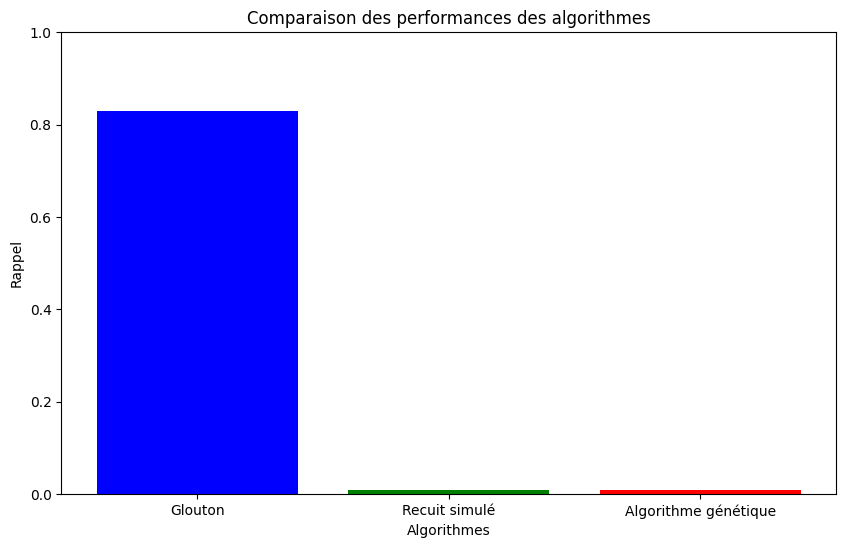

In [ ]:

algorithmes = ["Glouton", "Recuit simulé", "Algorithme génétique"]
#valeur des rappel
rappel = [0.83, 0.01, 0.01]
# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(algorithmes, rappel, color=['blue', 'green', 'red'])
plt.xlabel("Algorithmes")
plt.ylabel("Rappel")
plt.title("Comparaison des performances des algorithmes")
plt.ylim(0, 1)
plt.show()


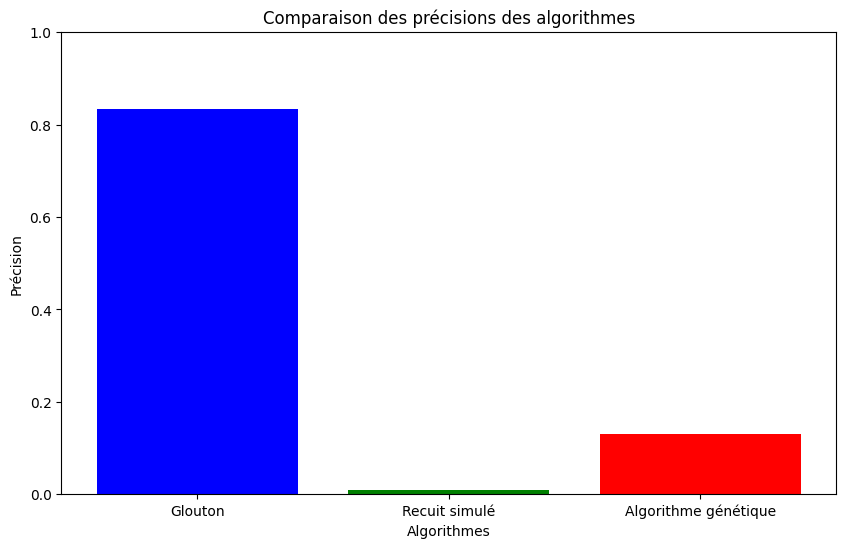

In [ ]:


algorithmes = ["Glouton", "Recuit simulé", "Algorithme génétique"]
accuracies = [0.834, 0.009, 0.130]

# Création du graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(algorithmes, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Algorithmes")
plt.ylabel("Précision")
plt.title("Comparaison des précisions des algorithmes")
plt.ylim(0, 1)
plt.show()



Les résultats des précisions et des rappels pour les trois algorithmes (Glouton, Recuit simulé, Algorithme génétique) sont les suivants :

> Bloc en retrait



| Algorithme/Metrics | Accuracy  |Rappel|
|-------|-----|-------------|
| Glouton   | 83.4%| 83%    |
| Recuit simulé | 0.9%  | 1%  |
| Génétique | 13%  |  1%  |


Pour l'algorithme Glouton, on observe la précision et le rappel les plus élevés, ce qui indique que cet algorithme a réussi à trouver des solutions optimales ou proches de l'optimale dans une grande proportion des cas. Cela suggère que l'algorithme glouton est particulièrement efficace pour résoudre le problème du sac à dos avec cet ensemble de données.

En revanche, l'algorithme Recuit simulé affiche des précisions et des rappels très bas, ce qui suggère qu'il a du mal à trouver des solutions de haute qualité. Le recuit simulé est généralement sensible aux paramètres, et il se peut que les paramètres utilisés dans cette exécution ne soient pas optimaux.

L'algorithme Algorithme génétique montre également des résultats médiocres en termes de précision et de rappel. Malgré les ajustements de paramètres effectués pour améliorer ses performances nous avans toujours des resultats très bas.









--------------------------------------------------------------------------


**9. Conclusion**
En conclusion, l'algorithme glouton semble être le meilleur choix parmi les trois pour résoudre le problème du sac à dos avec cet ensemble de données particulier. Cependant, il est important de noter que les performances des algorithmes peuvent varier en fonction des paramètres et des caractéristiques spécifiques de l'ensemble de données, et il peut être nécessaire d'explorer davantage d'options pour obtenir de meilleures performances.

Pour améliorer les performances des algorithmes du  recuit simulé et l'algorithme génétique nous pouvons ajuster les Paramètres tels que la température initiale, le taux de refroidissement, et le nombre d'itérations. Expérimentez avec différentes valeurs de ces paramètres nous permetra de  trouver une combinaison qui fonctionne bien avec le dataSet.

--------------------------------------------------------------------------


**10. Références**

* https://openclassrooms.com/fr/courses/7771531-decouvrez-les-librairies-python-pour-la-data-science/7858285-tracez-des-graphiques-avec-matplotlib
* https://chat.openai.com
* https://www.kaggle.com/datasets/warcoder/knapsack-problem/data
* https://www.youtube.com/watch?v=RLYoEyIHL6A
* https://www.youtube.com/watch?v=9PQV_yERZBU

**Hint:**

Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *General access* , remplacez *Restricted* par « Anyone with the link ».